<div class="alert alert-block alert-success">
This jupyter notebook is part of the supplementary material for the book "Materials Data Science" (Stefan Sandfeld, Springer, 2024, DOI 10.1007/978-3-031-46565-9). For further details please refer to the accompanying webpage at <a href="https://mds-book.org">https://mds-book.org</a>.
</div>

In [102]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy import stats

## 10.8 Bivariate Normal Distribution
### Plot the Distribution
The bivariate normal distribution is given by the location of the "peak" of the distribution and by a parameter that describe its spread along the two directions. 

We assume that the major and minor axis of the elliptical isolines of the distribution  are alligned with the x and y coordinate axis, and thus the covariance matrix has non-zero entries only on the main diagonal:
$$\operatorname{Cov}=\begin{bmatrix}\sigma_x^2&0\\0&\sigma_y^2\end{bmatrix}$$
where $\sigma_x$ and $\sigma_y$ are the standard deviations of the normal distribution along $x$ and $y$ direction, respectively.

In [103]:
# location of the center of the distribution
mean = np.array([1, 2], dtype=float)

# standard deviations along the two directions
sigma_x, sigma_y = 1.6, 0.7

# resulting covariance matrix
cov = np.array([[sigma_x ** 2, 0.], 
                [0., sigma_y ** 2]], dtype=float)



xlim = (-4, 6)
ylim = xlim

rv = stats.multivariate_normal(mean=mean, cov=cov)
x, y = np.linspace(*xlim, 80), np.linspace(*ylim, 80)
X, Y = np.meshgrid(x, y)
XY = np.dstack((X, Y))
Z = rv.pdf(XY)

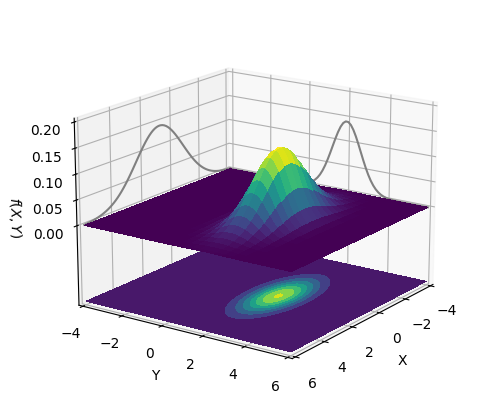

In [104]:
# Create a figure with axis `ax0` and then add a 3d axis `ax`, 
# we used ax0 only temporarily so that we can position axis `ax` on it using `add_axes`. 
# This is a hack for fixing the problem that in 3d plots sometimes the 
# x/y/zlabels or ticks are outside the visible area. 
fig, tmp_ax = plt.subplots(figsize=(6, 4)) 
ax = fig.add_axes([0.08, 0., 0.9, 1], projection='3d')  # (left, bottom, width, height)
tmp_ax.set_axis_off()  # make "invisible"

ax.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=0, antialiased=False, cmap='viridis')
cset = ax.contourf(X, Y, Z, zdir='z', offset=-0.15, cmap=cmap)

# show the marginal density distributions
ax.plot3D(x, ylim[0] * np.ones_like(x), Z.max(axis=0), c='0.5')
ax.plot3D(xlim[0] * np.ones_like(y), y, Z.max(axis=1), c='0.5')

# Adjust the view angle and details of the ticks, axes labels etc
ax.view_init(17, 35)
ax.set(xlim=xlim, ylim=ylim, zlim=(-0.15,0.2),
       zticks=np.linspace(0,0.2,5),
       xlabel='X', ylabel='Y', zlabel='$f(X, Y)$');

### Isolines of a bivariate normal distribution
(For details, please refer to chapter 10, section 8 of the MDS book)

The dataset is obtained by sampling a normal distribution, $𝑋_1 , 𝑋_2 ∼ \mathcal{N}$, which is defined through the mean and the 2×2 covariance matrix.

In [105]:
from scipy.stats import multivariate_normal

true_mean = np.array([5, 3], dtype=float)
true_cov = np.array([[2., 0.], [0., 0.3]], dtype=float)
rv = multivariate_normal(mean=true_mean, cov=true_cov)
X = rv.rvs(size=2000)

We then compute the sample mean, which is used to define the center of the ellipse,
and the sample covariance matrix, which is used to obtain the standard deviations.

In [106]:
sample_mean = np.mean(X, axis=0)
sample_cov = np.cov(X, rowvar=False)
mu1, mu2 = sample_mean
sigma1, sigma2 = np.sqrt((sample_cov[0,0], sample_cov[1,1]))

The next two cells implement the equations for the ellipse (see section 10.8 and the appendix of the MDS book):

In [107]:
def ellipse(x1, mu1, mu2, a, b):
    y = np.sqrt((1 - ((x1 - mu1) ** 2) / (a ** 2)) * (b ** 2))
    x1 = np.hstack((x1, x1[::-1], [x1[0]]))
    return x1, mu2 + np.hstack((y, - y, y[0]))

In [108]:
c = 0.01
fac = np.log(1 / (2 * np.pi * c * sigma1 * sigma2))
a = np.sqrt(2 * sigma1 ** 2 * fac)
b = np.sqrt(2 * sigma2 ** 2 * fac)
x1 = mu1 + 0.999 * np.linspace(-a, a, 200, )
x1, x2 = ellipse(x1, mu1, mu2, a, b)

There, the np.hstack functions are used to create data of the upper and lower half of
the ellipse in a format suitable for plotting.

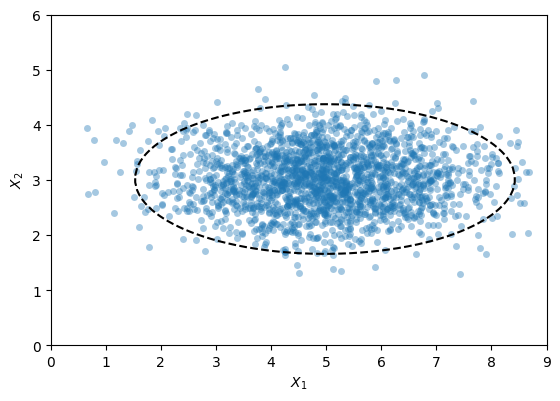

In [109]:
fig, ax = plt.subplots()
ax.plot(X[:, 0], X[:, 1], 'o', mfc='C0', mec='none', alpha=0.4, ms=5)
ax.plot(x1, x2, 'k--')
ax.set_aspect('equal')
ax.set(xlim=(0, 9), ylim=(0, 6), xlabel='$X_1$', ylabel='$X_2$');

Note that the covariance matrix of the dataset X might have small, non-zero off-diagonal entries.
This would imply that the ellipse, that fits best to the data would be slightly rotated.
This is, for simplicity, ignored here.